In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans

## Part A

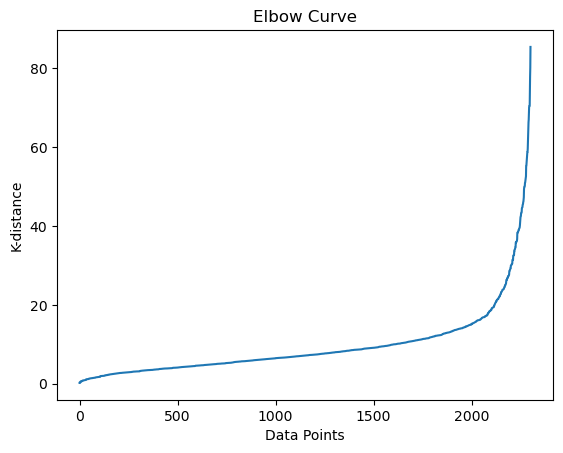

The optimal range of epsilon are 20 to 40


In [2]:
data=np.loadtxt("Dataset2.csv",delimiter=",",dtype=str)
data=data.astype(np.float64)
# taking the input

neighbors = (NearestNeighbors(n_neighbors=2,algorithm='auto')).fit(data)
arr=[]
arr = neighbors.kneighbors(data)
distances=arr[0]
indices=arr[1]
distances = np.sort(distances,axis=0)
distances = distances[:,1]

# plotting the Elbow curve and finding the optimal range for epsilon
plt.title("Elbow Curve")
plt.xlabel("Data Points")
plt.ylabel("K-distance")
plt.plot(distances)
plt.show()
print('The optimal range of epsilon are 20 to 40')

## PART B

In [3]:
def DBSCAN(X,Eps,Minpts):
    # Initialising Variables
    N_points=X.shape[0]
    visited = np.zeros(X.shape[0],dtype=bool)
    Cluster_labels = np.zeros(N_points,dtype=int)
    cluster_id=0
    i=0
    # Initialising the parameters 
    
    def get_neighbors(data, index, Eps):
        neighbors = []
        for i in range(len(data)):
            if i != index:
                dist = np.linalg.norm(data[i]-data[index]) #calculate euclidean distance between two points
                if dist <= Eps:
                    neighbors.append(i)
        return neighbors
    # get neighbors returns the neighbors of the particular point
    
    # iterating through the data set
    while(i<N_points):
        
        if not visited[i]:
            
            visited[i] = True

            # find all neighbors of the current point
            neighbors = get_neighbors(data,i,Eps)

            if (len(neighbors) < Minpts):
                # Mark points as noise
                Cluster_labels[i]=-1
            else:
                # Expand Cluster
                cluster_id +=1
                Cluster_labels[i] = cluster_id

                # Process all neighbors of current point
                j=0
                while (j < len(neighbors)):
                    neighbor = neighbors[j]
                    if not visited[neighbor]:
                        visited[neighbor] = True

                        # find all the neighbors of this neighbor
                        new_neighbors = get_neighbors(data,neighbor,Eps)

                        if (len(new_neighbors) >= Minpts):
                            # Add new neighbors to current cluster
                            neighbors=neighbors+new_neighbors

                        # Assign CLuster ID to neighbor    
                    if (Cluster_labels[neighbor] == 0 or Cluster_labels[neighbor] == -1):
                            Cluster_labels[neighbor] = cluster_id

                    j+=1
   
        i+=1
    
    return Cluster_labels        

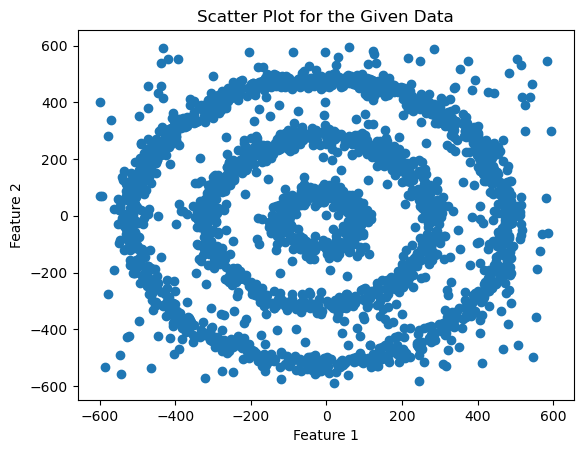

In [4]:
plt.scatter(data[:,0],data[:,1])
plt.title("Scatter Plot for the Given Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
# Plotting the Scatter plot

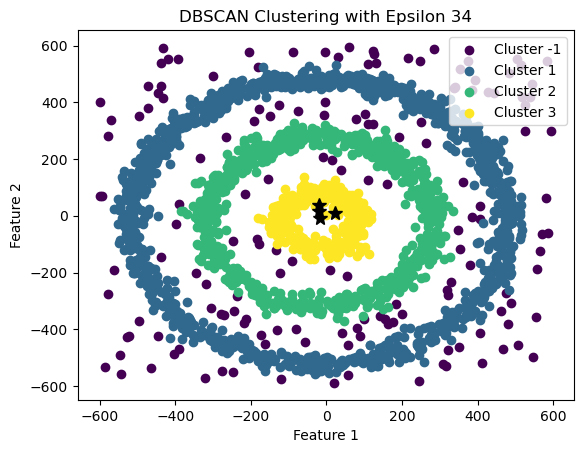

In [9]:
Cluster_labels = DBSCAN(data,34,5)

cmap = plt.get_cmap('viridis',len(np.unique(Cluster_labels)))

# Plotting the data and adding cluster centroids

for i, label in enumerate(np.unique(Cluster_labels)):
       
        plt.scatter(data[Cluster_labels == label, 0], data[Cluster_labels == label, 1], color=cmap(i),label=f'Cluster {label}')
        centroid = np.mean(data[Cluster_labels == label],axis=0)
        plt.plot(centroid[0],centroid[1],marker='*',color='black',markersize=10)
        
# Add the legend and adjusting the axis labels
plt.title("DBSCAN Clustering with Epsilon 34")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

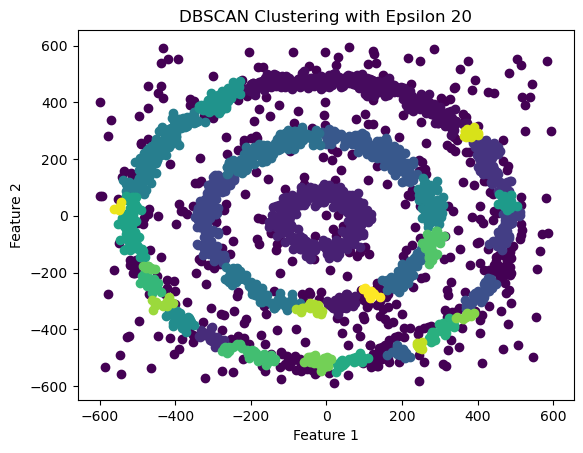

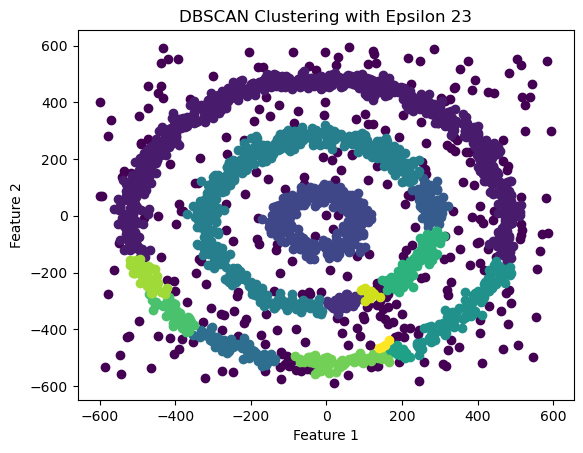

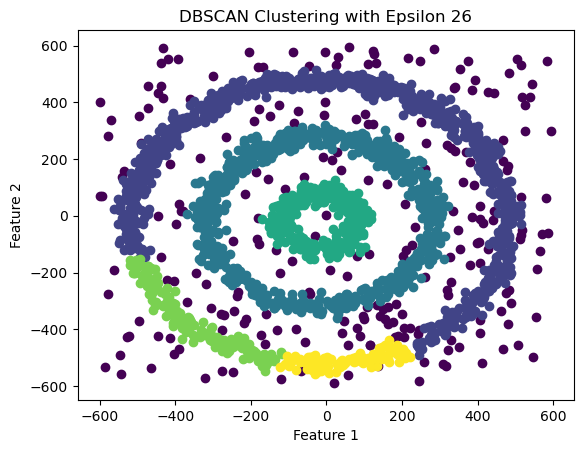

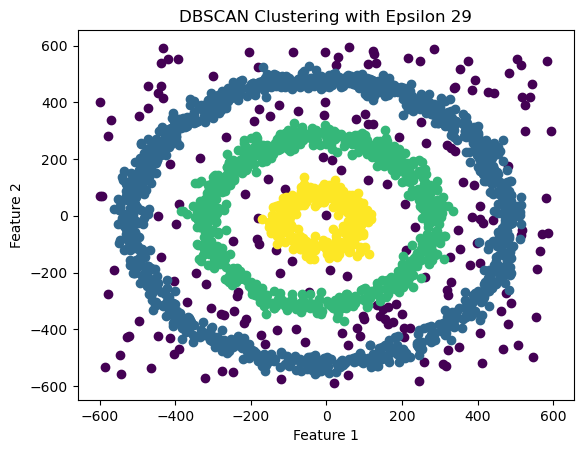

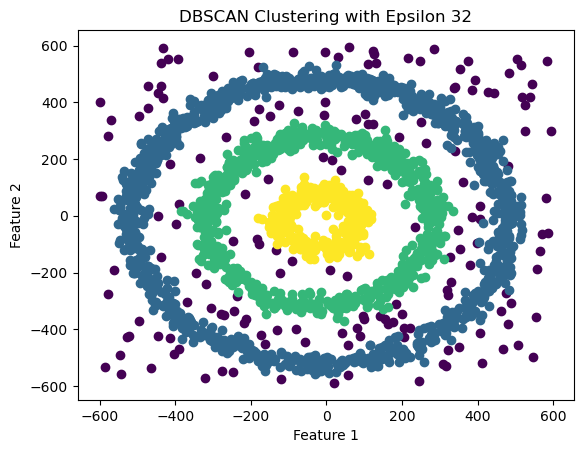

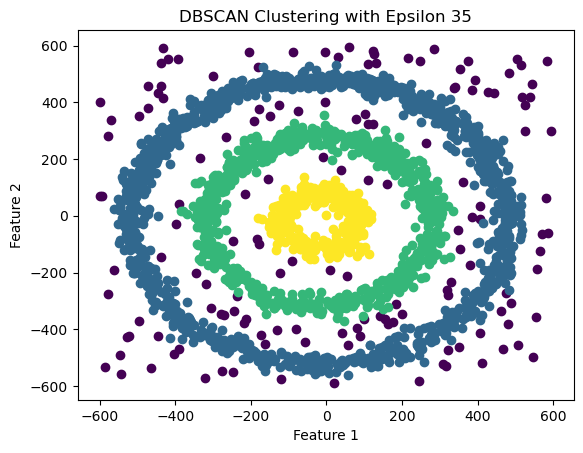

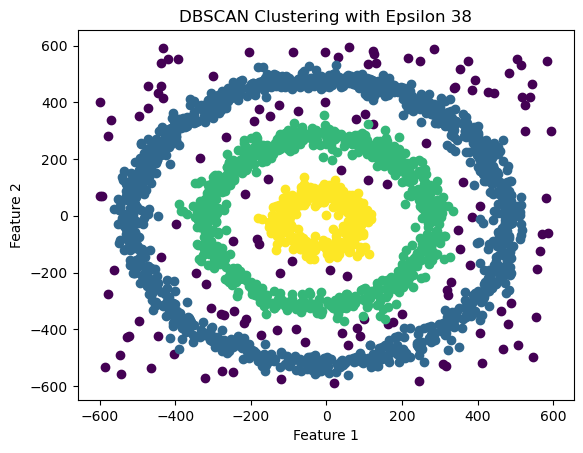

From Visualisation we can conclude that optimal value of Epsilon is 35


In [6]:
# plotting the scatter plots for the given epsilon range and finding the optimal epsilon

for Eps in range(20,40,3):
    Cluster_labels=DBSCAN(data,Eps,5)
    cmap = plt.get_cmap('viridis',len(np.unique(Cluster_labels)))

    # Plotting the data and adding cluster centroids
    for i, label in enumerate(np.unique(Cluster_labels)):
            plt.scatter(data[Cluster_labels == label, 0], data[Cluster_labels == label, 1], color=cmap(i),label=f"Label {label}")
            
   
    plt.title(f"DBSCAN Clustering with Epsilon {Eps}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
print("From Visualisation we can conclude that optimal value of Epsilon is 35")

# PART C

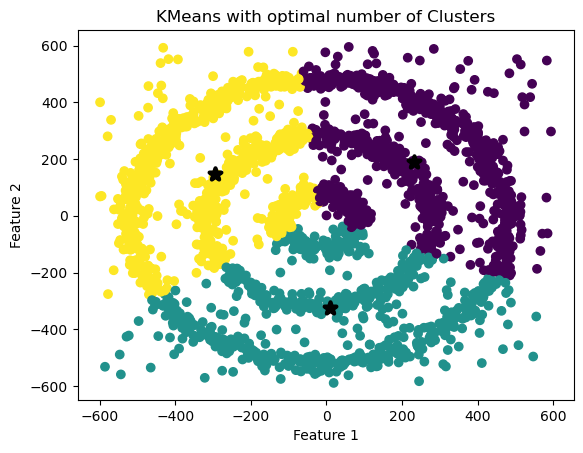

In [7]:
# implementing the KMeans algorithm with number of clusters as 3, which we obtained from the previous plots

num_clusters = 3

k_means=KMeans(n_clusters=3,n_init=100)
k_means.fit(data)
# Initialiing the KMeans object

centroids = k_means.cluster_centers_
labels = k_means.labels_
# Get the labels for each data point

plt.scatter(data[:,0],data[:,1],c=labels)

for i in range(num_clusters):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='*', s=80, c='k',linewidths=3)

#Plotting the Scatter plot for the dataset
plt.title("KMeans with optimal number of Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()